# News_NLP

This notebook is to demonstrate how to use News-NLP pacakge. `pip install  news-nlp`

https://pypi.org/project/news-nlp/

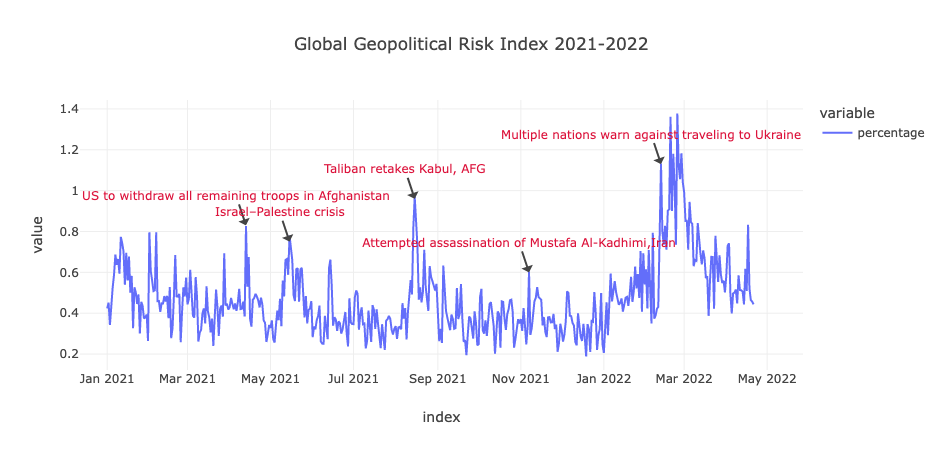

In [1]:
# !pip install  news-nlp

* Fetch news articles from Google News API, `from News_NLP.GNews import GNews`,
* Preproces news data for sentiment analysis and news type classifier, `from News_NLP.preprocessing import Preprocessing_Clf_SA`
* Preproces news data for multiple-geolocator `from News_NLP.preprocessing import Preprocessing_GEO`,\
* Implement pretrained deep leanring model to caterise news article `from News_NLP.gpr_classifier import GPR_Clf`,\
* Perform sentiment classifier `from News_NLP.sentiment_clf import Sen_Clf`,\
* Implement multiple geolocator News_NLP.geolocator `import Get_CSC_Prob, CSC_Prob`,

## 1. Import libraries

In [1]:
import pandas as pd
import News_NLP
from News_NLP.GNews import GNews
from News_NLP.preprocessing import Preprocessing_Clf_SA, Preprocessing_GEO,Combine_Col
from News_NLP.gpr_classifier import GPR_Clf
from News_NLP.sentiment_clf import Sen_Clf
from News_NLP.geolocator import Get_CSC_Prob, CSC_Prob

[nltk_data] Downloading package punkt to /home/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/jason/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /home/jason/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jason/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jason/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jason/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
# # %%capture
%load_ext watermark
%watermark -a "Jason Lu, luzhenxian@hotmail.com" -u -d -p pandas,spacy,cliff

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Jason Lu, luzhenxian@hotmail.com

Last updated: 2023-02-06

pandas: 1.5.3
spacy : 2.3.9
cliff : 2.6.1



## 1. Load Sample Data

This sample dataset is orginally fetch from Google News API, and duplicate rows are dropped.

In [3]:
data= pd.read_csv('./News_NLP/data/SampleNews.csv',index_col=0)
data.head(2)

,news_id,source_name,author,title,content,description,publishedAt,search_term,url
0,fcfe84da95d74daaa0187fe80c649fce,India Today,NaN,‘Jungle raj’ prevails in TMC-ruled Bengal: BJP...,A BJP fact-finding team on Saturday said 'Jung...,A BJP fact-finding team has said 'jungle raj' ...,2022-09-17T16:49:37Z,corrupt,https://www.indiatoday.in/india/story/jungle-r...
1,54c7e3222f1c477ea0818ac260e3d3dd,YLE News,NaN,Court fines non-commissioned officer for threa...,Satakunta District Court has fined a non-commi...,The 22-year-old defendant regularly used racis...,2022-09-02T14:06:14Z,kill,https://yle.fi/news/3-12607133


Alternatively, dataset can also be downloaded using `News_NLP.GNews`, however, Developer accounts are limited to 100 requests over a 24 hour period (50 requests available every 12 hours), Therefor one needs to register news account, https://newsapi.org/docs/client-libraries/python

In [4]:
# data = GNews()

In [5]:
data.shape

(1000, 9)

In [6]:
data.columns

Index(['news_id', 'source_name', 'author', 'title', 'content', 'description',
       'publishedAt', 'search_term', 'url'],
      dtype='object')

## 2. Clean Data

In [7]:
# merge news title, description and content
data = Combine_Col(data, 'title', 'description')
data = Combine_Col(data, 'title_description','content')
data.drop(['title_description'],axis=1, inplace=True)

# clean news articles for classifiers and geolocator
data['TDC_Clf_SA'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_Clf_SA(x))
data['TDC_Geo'] = data['title_description_content'].progress_apply(lambda x : Preprocessing_GEO(x))
# sort values
data.sort_values(by='publishedAt',ascending=False, inplace=True)
# drop duplicate rows, just in case
data.drop_duplicates('url', keep='first',inplace=True)
data.drop_duplicates('content', keep='first',inplace=True)
data.reset_index(inplace=True, drop=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On..."
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S..."


## 3. Cateriose News articles into seven predefined classes.

Class code and news topic name

|class|name|
|--|--|
|0|non-GPR|
|1|Conflict|
|2|Terror Threat|
|3|Corruption|
|4|Social|
|5|Governance|
|6|~~Water~~|
|7|~~Land~~|
|8|~~Air~~|
|9|Foreign Policy|
|10|Environment|

Class 6, 7, 8 are excluded

In [9]:
# categorise news topics
gpr_data = GPR_Clf(data)

  0%|          | 0/5592 [00:00<?, ?it/s]

/home/jason/anaconda3/envs/JL/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.1.1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/jason/anaconda3/envs/JL/lib/python3.10/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.1.1 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
gpr_data.head(1)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo,pred_class
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On...",1


In [11]:
# class 0 non-gpr news articles are dropped
gpr_data.pred_class.unique()

array([ 1,  9,  4,  3,  5, 10,  2])

Now news articles are classified to 7 types.  `GPR_Clf()` implements a pretrained NLP deep learning model. Please contact the author if you are interested in how to make and optimmise this classifier.

## 4 Sentiment Classifier

This step will classify news articles in to three sentiment classes, positive, netural and negative. In this pacakge, the sentiment classifier is trained in a DNN supervised learning model.

In [12]:
# implement sentiment classifier
gpr_sen_data =  Sen_Clf(gpr_data)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
gpr_sen_data.head(2)

,title_description_content,news_id,source_name,author,title,content,description,publishedAt,search_term,url,TDC_Clf_SA,TDC_Geo,pred_class,Symantic
0,The Burkina strongman kicked out in a coup. On...,3e475d9e1f78432b9e5fdc66dbe22531,FRANCE 24 English,FRANCE24,The Burkina strongman kicked out in a coup,Ouagadougou (AFP) Burkina Faso strongman Lieut...,On Friday military officials said they had rem...,2022-09-30T23:12:23Z,coup,https://www.france24.com/en/live-news/20220930...,the burkina strongman kicked coup friday milit...,"The Burkina strongman kicked out in a coup, On...",1,-0.9961
1,"China, India and Brazil abstain in vote on US ...",78f08bc1709546dbb11857167fbf3e30,RT,RT,"China, India and Brazil abstain in vote on US ...",Russia has accused the US of baiting it into u...,Russia accused the US of pushing it to use its...,2022-09-30T21:57:17Z,"""security council""",https://www.rt.com/news/563837-russia-security...,china india brazil abstain vote resolution rus...,"China, India and Brazil abstain in vote on U.S...",9,-0.9493


In [14]:
# check sentiment polarity
sentiment_strength = list(gpr_sen_data.Symantic)
max(sentiment_strength), min(sentiment_strength)

(0.9999, -0.9999)

The Symantic Columns is the sentiment strength ranging from -1 to 1. One indicates positive opinions of the news auther, Minus one show a negative.

## 5. Statitical Hierarchy Model and Multi_Geolocator

`Get_CSC_Prob()` contains a Statitical Hierarchy Model and a Multi_Geolocator.  The Statitical Hierarchy Model will assign a probability to a location.  Multi_Geolocator will recoganise location name entities and geolocate them in terms of country code, location type, lat, lon and polupation and so on.

Cliff geoparse container must be started first

`docker pull rahulbot/cliff-clavin:2.6.1` 

`docker run -p 8080:8080 -m 8G -d rahulbot/cliff-clavin:2.6.1`

In [15]:
%%time
df_Get_CSC_Prob = Get_CSC_Prob(gpr_sen_data)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 24.4 s, sys: 395 ms, total: 24.8 s
Wall time: 1min 2s


In [16]:
df_Get_CSC_Prob.head(5)

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,news_id,LocatioTypeId
0,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
2,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,3e475d9e1f78432b9e5fdc66dbe22531,NaN
3,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,3e475d9e1f78432b9e5fdc66dbe22531,NaN
4,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,18.0,0.7325,78f08bc1709546dbb11857167fbf3e30,NaN


## 6. 

In [17]:
# slice sentiment strength and news type
symantic_gpr = gpr_sen_data[['news_id','Symantic','pred_class']] 

In [18]:
# merge sentiment strength, news type and geolocator's output
new_data = symantic_gpr.merge(df_Get_CSC_Prob,how='inner', on=['news_id'])
new_data

,news_id,Symantic,pred_class,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,LocatioTypeId
0,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581,NaN
1,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581,NaN
2,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,NaN
3,3e475d9e1f78432b9e5fdc66dbe22531,-0.9961,1,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,NaN
4,78f08bc1709546dbb11857167fbf3e30,-0.9493,9,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,18.0,0.7325,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5907364,Brampton,CA,PPL,P,6251999,08,6093943,433806,-79.76633,43.68341,1,15.0,0.7325,NaN
6379,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,9972749,Greater Toronto Area,CA,AREA,L,6251999,08,6093943,6000000,-79.26636,43.75919,AREA,15.0,0.7325,NaN
6380,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5932099,Credit River,CA,STM,H,6251999,08,6093943,0,-79.59372,43.55206,STM,15.0,0.7325,NaN
6381,d4519df1356e43baa32625bb6c20eeb3,0.8519,10,5950270,Etobicoke Creek,CA,STM,H,6251999,08,6093943,0,-79.54961,43.58342,STM,15.0,0.7325,NaN


Based on the this new dataset, a geolopitical risk index can be designed. This will be demenstraged in another notebook.

Additonally,given a string, such as cleaned news body, `CSC_Prob()` returns a dataframe containing geolocator's output.

In [19]:
# a sample news articles after implementing sentimtnet classifier, news type classifier.
gpr_sen_data.TDC_Geo[0]

'The Burkina strongman kicked out in a coup, On Friday military officials said they had removed him as head of the junta in the second coup this year, Damiba had first-hand experience with the brutal jihadist insurgency that he cited as the pretext for seizing power in January, But it was enough to placate the rebelling military, who tore into his record on security as they announced his dismissal in a national television address, When Damiba junta overthrew the country elected president, Roch Marc Christian Kabore, the latter too was facing anger over his failure to stem the crisis, Since the first jihadist attacks in, thousands of people have died and about two million have been displaced by the fighting, During his eight months at the head of the junta, Damiba tried to launch a process of dialogue with some armed groups, while intensifying the offensive actions of the army, In early September, Damiba welcomed a relative calm in several places, But the attacks have remained numerous,

In [20]:
CSC_Prob(gpr_sen_data.TDC_Geo[0])

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability
0,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581
1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581
2,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325
3,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN


In [21]:
df_Get_CSC_Prob.head(5)

,LocationId,LocationName,CountryCode,FeatureCode,FeatureClass,CountryGeoNameId,StateCode,StateGeoNameId,Population,Longitude,Latitude,LocationTypeId,Frequency,Probability,news_id,LocatioTypeId
0,3017382,Republic of France,FR,PCLI,A,3017382,00,,66987244,2.0,46.0,3,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
1,2988507,Paris,FR,PPLC,P,3017382,11,,2138551,2.3488,48.85341,1,4.0,0.1581,3e475d9e1f78432b9e5fdc66dbe22531,NaN
2,2361809,Burkina Faso,BF,PCLI,A,2361809,00,,19751535,-1.66667,12.5,3,4.0,0.7325,3e475d9e1f78432b9e5fdc66dbe22531,NaN
3,2425938,Sahel,,RGN,L,,,,389380000,2.46094,17.30869,RGN,NaN,NaN,3e475d9e1f78432b9e5fdc66dbe22531,NaN
4,2017370,Russian Federation,RU,PCLI,A,2017370,00,,144478050,100.0,60.0,3,18.0,0.7325,78f08bc1709546dbb11857167fbf3e30,NaN


Additionally, a docker image of News_NLP is also available https://hub.docker.com/repository/docker/zhenxianlu/news-nlp-amd64/general

`docker pull zhenxianlu/news-nlp-amd64`